Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas
depressivos nos EUA no período de 2005-2006?

Hábitos saudáveis de alimentação e atividade física estão associados a
menores índices de depressão nesta população?

## **Importações**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kendalltau, spearmanr, chi2_contingency

## **Conhecendo o DataFrame - Demo**

Será observadas as características básicas do DataFrame demo. O objetivo é compreender a quantidade de colunas, seus tipos, quantidade de linhas, dentre outros.

### **Dicionário das Variáveis** - Demo

* **SEQN:** Identificador único do respondente.

* **DPQ010:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por ter pouco interesse ou pouco prazer em fazer as coisas?

    * **Valores:**
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ020:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu para baixo, deprimido(a) ou sem perspectiva?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ030:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ040:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu cansado(a) ou com pouca energia?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ050:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você sentiu falta de apetite ou comeu demais?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ060**:

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ070:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ080:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ090:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **RIAGENDR:**

    * **Descrição:** Gênero
    * **Valores:**
        * 1: Masculino
        * 2: Feminino

* **RIDAGEYR:**

    * **Descrição:** Idade em anos

* **RIDRETH1:**

    * **Descrição:** Raça/Etnia
    * **Valores:**

        * 1: Branco não-hispânico
        * 2: Negro não-hispânico
        * 3: Mexicano-americano
        * 4: Outro
        * 5: Outro - Hispânico

* **DMDEDUC:**

    * **Descrição:** Escolaridade
    * **Valores:**
        * 1: Menor que 9o ano
        * 2: 9-12o ano
        * 3: Ensino médio
        * 4: Ensino superior incompleto
        * 5: Superior completo ou maior
        * 7: Se recusou a responder
        * 9: Não sabe

* **INDFMINC:**

    * **Descrição:** Renda anual familiar (US$)
    * **Valores:**
        * 1: 0-4999
        * 2: 5000-9999
        * 3: 10000-14999
        * 4: 15000-19999
        * 5: 20000-24999
        * 6: 25000-34999
        * 7: 35000-44999
        * 8: 45000-54999
        * 9: 55000-64999
        * 10: 65000-74999
        * 11: Maior ou igual a 75000
        * 12: Maior que 20000
        * 13: Menor que 20000
        * 77: Se recusou a responder
        * 99: Não sabe

In [54]:
demo = pd.read_csv('/Users/joaoaroca/Documents/Portfólio/depressao/portfolio/DEMO_PHQ.csv')

In [55]:
# Verificando as primeiras linhas do DataFrame
demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [56]:
# Verificando as informações básicas do DataFrame
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


As variáveis estão com um tipo que permite prosseguir com a análise, portanto, não serão transformadas em outros tipos.

Será realizado a soma de DPQ010 à DPQ090 para obter um valor que possa representar o grau de sintomas depressivos. Como o valor 7 representa que a pessoa se recusou a responder e o valor 9 significa que a pessoa não sabe, serão alterados para 0, para não influenciarem no Score.

In [57]:
# Seperando as colunas DPQ010 à DPQ090
colunas = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

# Como os valores de 7 e 9 podem influenciar a métrica DPQ_SCORE, mesmo não possuindo informações que contribuam, serão substituídos por 0, assim não influenciarão.
demo[colunas] = demo[colunas].replace({7: 0, 9: 0})

demo['DPQ_SCORE'] = demo[colunas].sum(axis=1)

Será criada a coluna DEPRESSION_CATEGORY que representará o grau de sintomas depressivos conforme descrito abaixo:

* 0 ("sem sintomas") se DPQ_SCORE < 5

* 1 ("sintomas leves") se 5 <= DPQ_SCORE < 10

* 2 ("sintomas moderados a severos") se DPQ_SCORE >= 10

In [58]:
# Criando a coluna CATEGORY com base no valor de DPQ_SCORE
#demo['DEPRESSION_CATEGORY'] = demo['DPQ_SCORE'].apply(lambda x: 0 if x < 5 else (1 if x < 10 and x >= 5 else 2))

In [59]:
# Criando a coluna CATEGORY com base no valor de DPQ_SCORE
demo['DEPRESSION_CATEGORY'] = demo['DPQ_SCORE'].apply(lambda x: 'Sem sintomas' if x < 5 else ('Sintomas leves' if x < 10 and x >= 5 else 'Sintomas moderados a severos'))

In [60]:
# Verificando se criou corretamente para os valores de DPQ_SCORE < 5
demo['DEPRESSION_CATEGORY'].loc[demo['DPQ_SCORE'] < 5].value_counts()

DEPRESSION_CATEGORY
Sem sintomas    4315
Name: count, dtype: int64

In [61]:
# Verificando se criou corretamente para os valores de DPQ_SCORE < 10 e >= 5
demo['DEPRESSION_CATEGORY'].loc[(demo['DPQ_SCORE'] < 10) & (demo['DPQ_SCORE'] >= 5)].value_counts()

DEPRESSION_CATEGORY
Sintomas leves    714
Name: count, dtype: int64

In [62]:
# Verificando se criou corretamente para os valores de DPQ_SCORE >= 10
demo['DEPRESSION_CATEGORY'].loc[demo['DPQ_SCORE']>= 10].value_counts()

DEPRESSION_CATEGORY
Sintomas moderados a severos    305
Name: count, dtype: int64

## **Limpeza dos dados** - Demo

In [63]:
# Veriricando a porcentagem de valores ausentes
demo.isnull().sum() / demo.shape[0] * 100

SEQN                   0.000000
DPQ010                 9.336333
DPQ020                 9.336333
DPQ030                 9.336333
DPQ040                 9.336333
DPQ050                 9.336333
DPQ060                 9.336333
DPQ070                 9.336333
DPQ080                 9.336333
DPQ090                 9.336333
RIAGENDR               0.000000
RIDAGEYR               0.000000
RIDRETH1               0.000000
DMDEDUC                0.000000
INDFMINC               0.881140
DPQ_SCORE              0.000000
DEPRESSION_CATEGORY    0.000000
dtype: float64

As colunas DPQ010 à DPQ090 apresentam uma quantidade significativa de valores nulos, portanto, deve-se análisar se os dados ausentes têm relação com alguma variável. Por estar interessado principalmente na presença e na direção de uma relação entre duas variáveis, independentemente da forma específica da relação, a correlação de Spearman ou de Kendall pode ser preferível. Portanto, será realizado ambos os testes para verificar se são aleatórias as ausencias de dados.

### Correlação de Kendall

In [64]:
# Criar variáveis indicadoras de ausência para as variáveis DPQ
for col in demo.columns:
    if col.startswith('DPQ'):
        demo[f'ausente_{col}'] = demo[col].isnull().astype(int)

# Variáveis de interesse
variaveis_interesse = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']

# Calcular a correlação de Kendall entre a presença de valores ausentes nas variáveis DPQ e as variáveis de interesse
correlacoes_kendall = {}
for col in demo.columns:
    if col.startswith('ausente_DPQ'):
        correlacoes_kendall[col] = {}
        for var in variaveis_interesse:
            tau, _ = kendalltau(demo[col], demo[var])
            correlacoes_kendall[col][var] = tau

# Converter o dicionário de correlações em um DataFrame para visualização
df_correlacoes_kendall = pd.DataFrame(correlacoes_kendall)

print(df_correlacoes_kendall)

          ausente_DPQ010  ausente_DPQ020  ausente_DPQ030  ausente_DPQ040  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.010756        0.010756        0.010756        0.010756   
RIDRETH1        0.036781        0.036781        0.036781        0.036781   
DMDEDUC        -0.057435       -0.057435       -0.057435       -0.057435   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ050  ausente_DPQ060  ausente_DPQ070  ausente_DPQ080  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.010756        0.010756        0.010756        0.010756   
RIDRETH1        0.036781        0.036781        0.036781        0.036781   
DMDEDUC        -0.057435       -0.057435       -0.057435       -0.057435   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ090  ausente_DPQ_SCORE  
RIAGENDR        0.011741                

### Correlação de Spearman

In [65]:
for col in demo.columns:
    if col.startswith('DPQ'):
        demo[f'ausente_{col}'] = demo[col].isnull().astype(int)

# Variáveis de interesse
variaveis_interesse = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']

# Calcular a correlação de Spearman entre a presença de valores ausentes nas variáveis DPQ e as variáveis de interesse
correlacoes_spearman = {}
for col in demo.columns:
    if col.startswith('ausente_DPQ'):
        correlacoes_spearman[col] = {}
        for var in variaveis_interesse:
            rho, _ = spearmanr(demo[col], demo[var])
            correlacoes_spearman[col][var] = rho

# Converter o dicionário de correlações em um DataFrame para visualização
df_correlacoes_spearman = pd.DataFrame(correlacoes_spearman)

print(df_correlacoes_spearman)

          ausente_DPQ010  ausente_DPQ020  ausente_DPQ030  ausente_DPQ040  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.013051        0.013051        0.013051        0.013051   
RIDRETH1        0.039521        0.039521        0.039521        0.039521   
DMDEDUC        -0.063881       -0.063881       -0.063881       -0.063881   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ050  ausente_DPQ060  ausente_DPQ070  ausente_DPQ080  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.013051        0.013051        0.013051        0.013051   
RIDRETH1        0.039521        0.039521        0.039521        0.039521   
DMDEDUC        -0.063881       -0.063881       -0.063881       -0.063881   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ090  ausente_DPQ_SCORE  
RIAGENDR        0.011741                

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_4512/359601840.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(demo[col], demo[var])


Como não apresentou forte correlação entre as variáveis, será realizada a limpeza dos valores nulos, para não prejuficar a análise. Está sendo considerado que os valores nulos apresentados no DataFrame são do tipo MCAR (Missing Completely At Random), ou seja, a probabilidade de um valor estar ausente é a mesma para todas as observações. Os valores ausentes são imprevisíveis e não podem ser explicados por nenhuma variável observada. A variável INDFMINC apresenta uma quantidade extremamente baixa de valores nulos, portanto, será removido os valores nulos também.

In [66]:
# Removendo as colunas que foram usadas na correlação
demo.drop(columns=['ausente_DPQ010', 'ausente_DPQ020',  'ausente_DPQ030', 'ausente_DPQ040', 'ausente_DPQ050', 'ausente_DPQ060',
       'ausente_DPQ070', 'ausente_DPQ080', 'ausente_DPQ090','ausente_DPQ_SCORE'], inplace= True)

In [67]:
# Removendo os valores nulos do DataFrame
demo.dropna(inplace=True)

## **Conhecendo o DataFrame - Pag**

### Dicionário de Dados - Pag

**SEQN:** Identificador único do respondente.

**PAG_MINW:** Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG).

**ADHERENCE:** Grupo de aderência ao Physical Activity Guideline (PAG).

* 1 = Baixo (< 150 min/semana)
* 2 = Adequado (150-300 min/semana)
* 3 = Acima (> 300 min/semana)

**HEI2015C1_TOTALVEG:** Healthy Eating Index - Componente 1 - Total de Vegetais.
* Valores possíveis: 0-5

**HEI2015C2_GREEN_AND_BEAN:** Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas.
* Valores possíveis: 0-5

**HEI2015C3_TOTALFRUIT:** Healthy Eating Index - Componente 3 - Frutas totais.
* Valores possíveis: 0-5

**HEI2015C4_WHOLEFRUIT:** Healthy Eating Index - Componente 4 - Frutas in natura.
* Valores possíveis: 0-5

**HEI2015C5_WHOLEGRAIN:** Healthy Eating Index - Componente 5 - Grãos integrais.
* Valores possíveis: 0-10

**HEI2015C6_TOTALDAIRY:** Healthy Eating Index - Componente 6 - Laticínios.
* Valores possíveis: 0-10

**HEI2015C7_TOTPROT:** Healthy Eating Index - Componente 7 - Proteínas.
* Valores possíveis: 0-5

**HEI2015C8_SEAPLANT_PROT:** Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais.
* Valores possíveis: 0-5

**HEI2015C9_FATTYACID:** Healthy Eating Index - Componente 9 - Ácido-graxo.
* Valores possíveis: 0-10

**HEI2015C10_SODIUM:** Healthy Eating Index - Componente 10 - Sódio.
* Valores possíveis: 0-10

**HEI2015C11_REFINEDGRAIN:** Healthy Eating Index - Componente 11 - Grãos refinados.
* Valores possíveis: 0-10

**HEI2015C12_SFAT:** Healthy Eating Index - Componente 12 - Gordura saturada.
* Valores possíveis: 0-10

**HEI2015C13_ADDSUG:** Healthy Eating Index - Componente 13 - Açúcares adicionados.
* Valores possíveis: 0-10

**HEI2015_TOTAL_SCORE:** Healthy Eating Index - Escore total.
* Valores possíveis: 0-100

In [68]:
pag = pd.read_csv('/Users/joaoaroca/Documents/Portfólio/depressao/portfolio/PAG_HEI.csv')

In [69]:
# Obtendo informações básicas sobre o DataFrame
pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

O tipo de dados presente nas variáveis não interferem negativamente na análise, portanto, não serão transformadas.

Sabe-se que os dados do DataFrame "demo" já estão todos tratados para se utilizar na análise. Contudo, essa nova base de dados "pag" não foi verificada se necessita de limpeza. Foi observado que o DataFrame "pag" possui 9424 registros, enquanto o DataFrame "demo" possui apenas 4800 registros. Então, faz muito mais sentido fazer a junção das tabelas, antes mesmo de verificar as irregularidades do DataFrame "pag", visto que não serão utilizados todos os dados, logo, não necessita de limpeza em toda base. 

In [70]:
df_unido = pd.merge(demo, pag, how='left', on='SEQN')

## **Limpeza de Dados** - Pag

In [71]:
df_unido.isnull().sum() / len(df_unido) * 100

SEQN                        0.000000
DPQ010                      0.000000
DPQ020                      0.000000
DPQ030                      0.000000
DPQ040                      0.000000
DPQ050                      0.000000
DPQ060                      0.000000
DPQ070                      0.000000
DPQ080                      0.000000
DPQ090                      0.000000
RIAGENDR                    0.000000
RIDAGEYR                    0.000000
RIDRETH1                    0.000000
DMDEDUC                     0.000000
INDFMINC                    0.000000
DPQ_SCORE                   0.000000
DEPRESSION_CATEGORY         0.000000
PAG_MINW                    0.000000
ADHERENCE                   0.000000
HEI2015C1_TOTALVEG          2.041667
HEI2015C2_GREEN_AND_BEAN    2.041667
HEI2015C3_TOTALFRUIT        2.041667
HEI2015C4_WHOLEFRUIT        2.041667
HEI2015C5_WHOLEGRAIN        2.041667
HEI2015C6_TOTALDAIRY        2.041667
HEI2015C7_TOTPROT           2.041667
HEI2015C8_SEAPLANT_PROT     2.041667
H

Após a junção dos DataFrames foi observado uma quantidade extremamente baixa de valores ausentes, por não possuir uma quantidade alta, serão removidos os valores ausentes. 

In [72]:
df_unido.dropna(inplace=True)

## **Análise Exploratória Univariada**

### **Variáveis Categóricas**

In [73]:
df_unido

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
4796,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
4797,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
4798,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_4512/386647045.py:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  grafico = sns.countplot(x='RIAGENDR', data=df_unido, hue='RIAGENDR', legend= False, palette=custom_palette)


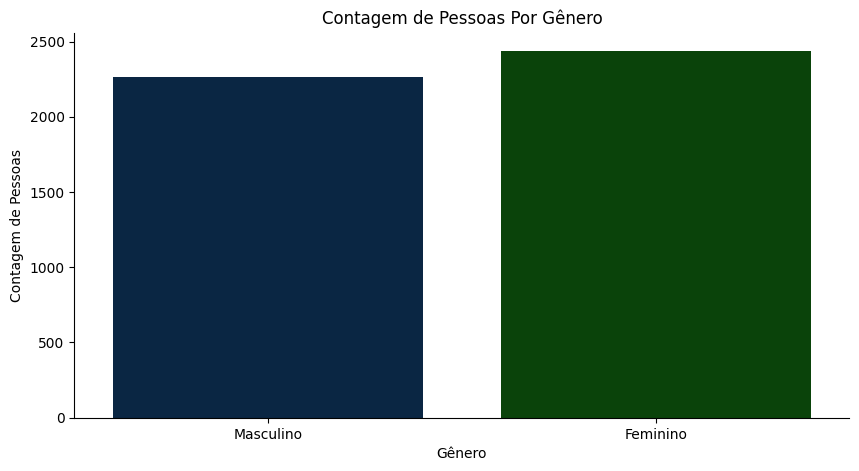

In [74]:
# Criando uma paleta de cores personalizada com tons escuros de azul, verde e roxo
custom_palette = sns.color_palette(['#00264d', '#004d00', '#330066', '#660033', '#1a1a1a'])

# Definindo o tamanho da figura
plt.figure(figsize=(10,5))

# Plotar o gráfico de barras com rótulos personalizados
grafico = sns.countplot(x='RIAGENDR', data=df_unido, hue='RIAGENDR', legend= False, palette=custom_palette)

# Definindo os rótulos formatados para os ticks do eixo x
plt.xticks([0, 1], ['Masculino', 'Feminino'])

# Definindo o título
grafico.set_title('Contagem de Pessoas Por Gênero')

# Definindo a legenda do eixo x
plt.xlabel('Gênero')

# Definindo legenda para o eixo y
plt.ylabel('Contagem de Pessoas')

# Remove a borda da direita
sns.despine(right=True)


- A quantidade de pessoas de ambos os gêneros são semelhantes, porém o gênero feminino apresenta uma quantidade superior.

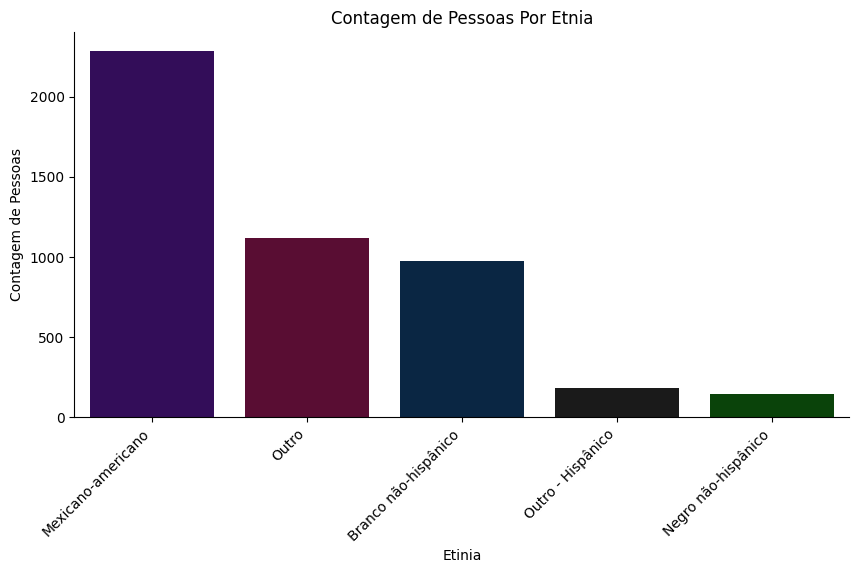

In [75]:
# Contar as ocorrências de cada valor em 'RIDRETH1' e ordenar de forma decrescente
ordem = df_unido['RIDRETH1'].value_counts().index

# Mapear os valores únicos de 'RIDRETH1' para as etnias correspondentes
etnia = {
    1: 'Branco não-hispânico',
    2: 'Negro não-hispânico',
    3: 'Mexicano-americano',
    4: 'Outro',
    5: 'Outro - Hispânico'
}

# Criar uma lista de rótulos com apenas as etnias
formatar_labels = [etnia[value] for value in ordem]

# Definindo o tamanho da figura
plt.figure(figsize=(10,5))

# Plotar o gráfico de barras com os valores ordenados
grafico = sns.countplot(x='RIDRETH1', data=df_unido, hue='RIDRETH1', order=ordem, palette=custom_palette, legend=False)

# Alterando o título
grafico.set_title('Contagem de Pessoas Por Etnia')

# Adicionando legenda no eixo x
plt.xlabel('Etinia')

# Adicionando legenda no eixo y
plt.ylabel('Contagem de Pessoas')

# Definindo os rótulos formatados para os ticks do eixo x
plt.xticks(ticks= range(len(ordem)), labels= formatar_labels, rotation= 45, ha= 'right')

# Removendo as bordas à direta
sns.despine(right= True)

- Existe uma quantidade bem maior de pessoas consideradas Mexicano-americano.

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_4512/1643722205.py:32: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  grafico = sns.countplot(x='DMDEDUC', data=df_unido, hue='DMDEDUC', order=ordem, palette=custom_palette, legend=False)


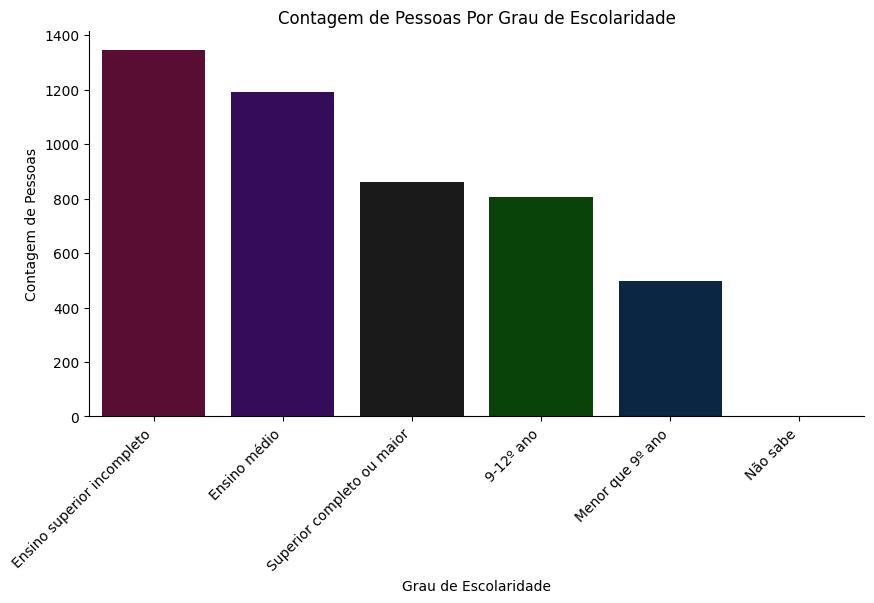

In [76]:
# Criando um dicionário com os valores correspondentes de escolaridade
escolaridade = {
    1: 'Menor que 9º ano',
    2: '9-12º ano',
    3: 'Ensino médio',
    4: 'Ensino superior incompleto',
    5: 'Superior completo ou maior',
    7: 'Se recusou a responder',
    9: 'Não sabe'

}

# Obetendo a ordem decrescente dos níveis de escolaridade
ordem =  df_unido['DMDEDUC'].value_counts().index

# Buscando em ordem as escolaridades
formatar_labels = [escolaridade[value] for value in ordem]

# Adicionando um tamanho à figura
plt.figure(figsize=(10, 5))

# Adicionando Título
plt.title('Contagem de Pessoas Por Grau de Escolaridade')

# Legenda do eixo x
plt.xlabel('Grau de Escolaridade')

# Legenda do eixo y
plt.ylabel('Contagem de Pessoas')

# Criando o gráfico
grafico = sns.countplot(x='DMDEDUC', data=df_unido, hue='DMDEDUC', order=ordem, palette=custom_palette, legend=False)

# Definir os rótulos formatados para os ticks do eixo x
plt.xticks(ticks=range(len(ordem)), labels=formatar_labels, rotation= 45, ha='right')

# Removendo as bordas à direta
sns.despine(right= True)

- A maior parte dos entrevistados possui ensino superior incompleto.

   * **Descrição:** Renda anual familiar (US$)
    * **Valores:**
        * 1: 0-4999
        * 2: 5000-9999
        * 3: 10000-14999
        * 4: 15000-19999
        * 5: 20000-24999
        * 6: 25000-34999
        * 7: 35000-44999
        * 8: 45000-54999
        * 9: 55000-64999
        * 10: 65000-74999
        * 11: Maior ou igual a 75000
        * 12: Maior que 20000
        * 13: Menor que 20000
        * 77: Se recusou a responder
        * 99: Não sabe


        rendas = {
    1: 'Baixo',
    2: 'Baixo',
    3: 'Baixo',
    4: 'Baixo',
    5: 'Baixo',
    6: 'Médio',
    7: 'Médio',
    8: 'Médio',
    9: 'Alto',
    10: 'Alto',
    11: 'Alto',
    12: 'Indefinido',
    13: 'Baixo',
    77: 'Indefinido',
    99: 'Indefinido'
}

In [77]:
# Criando uma função para categorizar os salários em Baixo, Médio e Alto
def categorizar_salario(salario):

    if salario in [1, 2, 3, 4, 5, 13]:
        return 'Baixo'
    elif salario in [6, 7, 8]:
        return 'Médio'
    elif salario in [9, 10, 11]:
        return 'Alto'
    else: # 12, 77, 99
        return 'Indefinido'


In [78]:
# Aplicando a função na coluna INDFMINC
df_unido['INDFMINC'] = df_unido['INDFMINC'].apply(categorizar_salario)

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_4512/268162679.py:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  grafico = sns.countplot(x='INDFMINC', data=df_unido, hue='INDFMINC', order=ordem, palette=custom_palette)


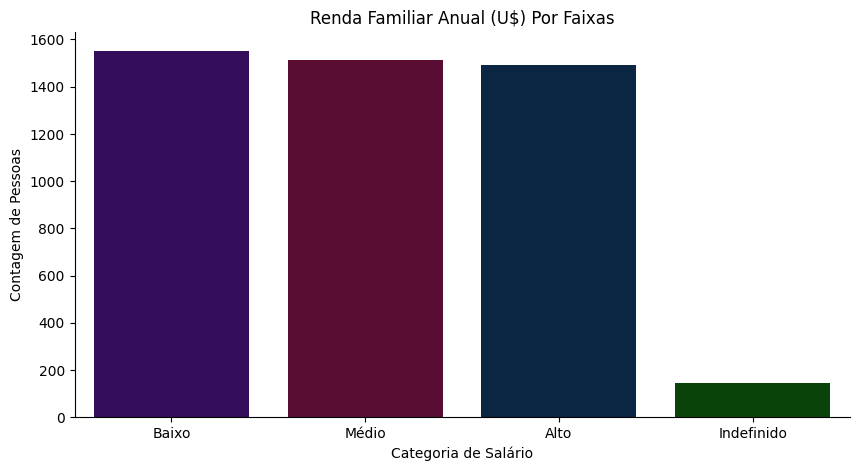

In [79]:
# Variável para ordenar de forma decrescente
ordem = df_unido['INDFMINC'].value_counts().index

# Definindo o tamanho
plt.figure(figsize=(10,5))

# Criando gráfico
grafico = sns.countplot(x='INDFMINC', data=df_unido, hue='INDFMINC', order=ordem, palette=custom_palette)

# Definindo o título
plt.title('Renda Familiar Anual (U$) Por Faixas')

# Legenda eixo x
plt.xlabel('Categoria de Salário')

# Legenda eixo y
plt.ylabel('Contagem de Pessoas')

# Removendo as bordas à direita
sns.despine(right= True)


- Possui-se uma quantidade equilibrada de renda, entre: baixa, média e alta.

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_4512/2813984950.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='DEPRESSION_CATEGORY', data=df_unido, hue='DEPRESSION_CATEGORY', legend=False, palette=custom_palette)


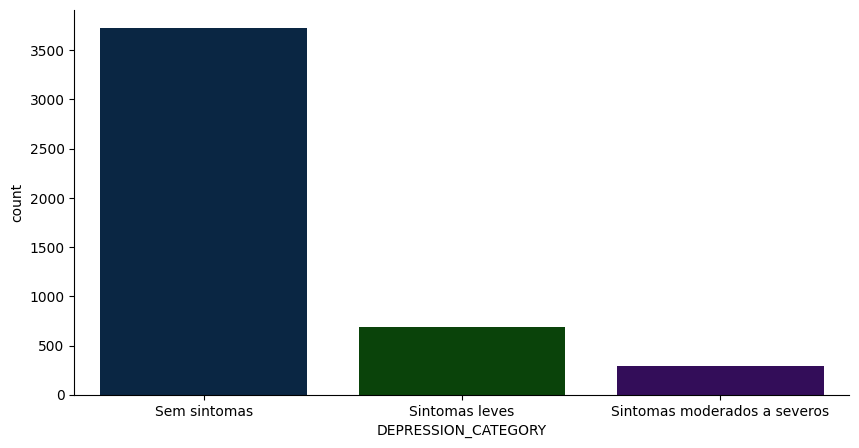

In [80]:
plt.figure(figsize=(10,5))

sns.countplot(x='DEPRESSION_CATEGORY', data=df_unido, hue='DEPRESSION_CATEGORY', legend=False, palette=custom_palette)

sns.despine(right= True)



**ADHERENCE:** Grupo de aderência ao Physical Activity Guideline (PAG).

* 1 = Baixo (< 150 min/semana)
* 2 = Adequado (150-300 min/semana)
* 3 = Acima (> 300 min/semana)

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_4512/964236135.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x= 'ADHERENCE', data= df_unido, hue='ADHERENCE', order=ordem, legend=False, palette=custom_palette)


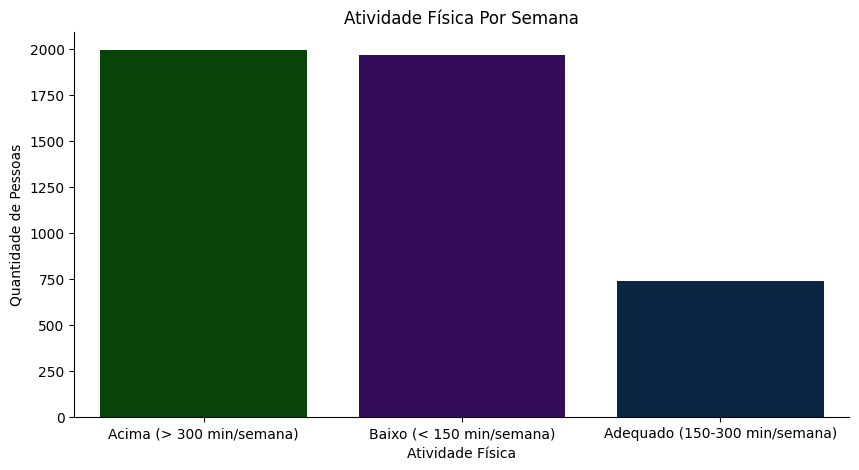

In [81]:
def converter_atividade_fisica(valor):

    if valor == 1:
        return 'Baixo (< 150 min/semana)'
    elif valor == 2: 
        return 'Adequado (150-300 min/semana)'
    elif valor == 3:
        return 'Acima (> 300 min/semana)'
    else:
        return 'Indefinido'


df_unido['ADHERENCE'] = df_unido['ADHERENCE'].apply(converter_atividade_fisica)
    

ordem = df_unido['ADHERENCE'].value_counts().index

plt.figure(figsize=(10,5))

sns.countplot(x= 'ADHERENCE', data= df_unido, hue='ADHERENCE', order=ordem, legend=False, palette=custom_palette)

plt.title('Atividade Física Por Semana')
plt.xlabel('Atividade Física')
plt. ylabel('Quantidade de Pessoas')

sns.despine(right=True)



- Muitas pessoas praticam exercícios acima do tempo adequado ou abaixo; 
- Poucas pessoas possuem o tempo de exercício adequado na semana.

### **Variáveis Numéricas**

In [82]:
df_unido.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_SCORE', 'DEPRESSION_CATEGORY', 'PAG_MINW',
       'ADHERENCE', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

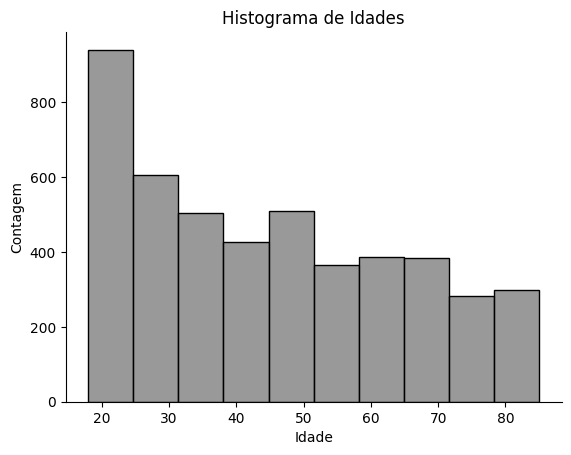

In [83]:
sns.histplot(x='RIDAGEYR', data=df_unido, bins=10, color='gray', edgecolor='black', alpha=0.8)

plt.title('Histograma de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Removendo Grid
plt.grid(False)

sns.despine(right=True)

In [84]:
df_unido['RIDAGEYR'].describe()

count    4702.000000
mean       44.918120
std        19.849216
min        18.000000
25%        27.000000
50%        43.000000
75%        61.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

- Maior quantidade de idades são até 20 anos;
- Distribuição relativamente uniforme;
- A média e mediana são próximas (44.91 e 43, repesctivamente);
- O menor valor é 18 e o maior 85.

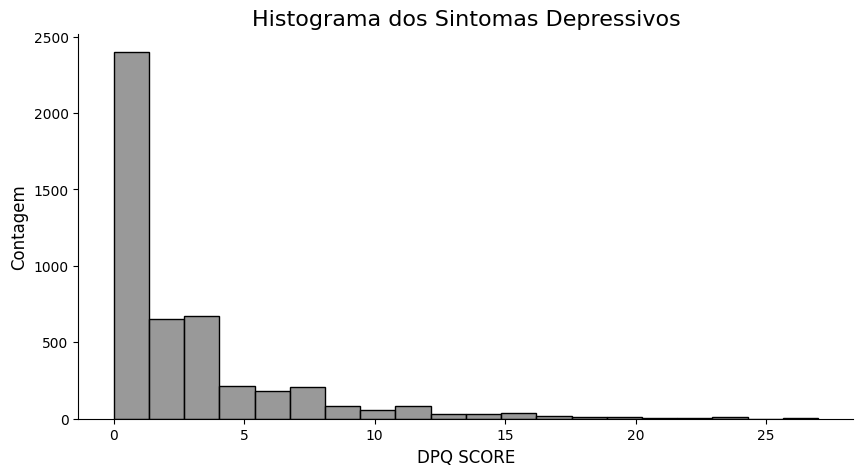

In [85]:
# Criação do histograma
plt.figure(figsize=(10, 5))
sns.histplot(x='DPQ_SCORE', data=df_unido, bins=20, color='gray', edgecolor='black', alpha=0.8)

# Adiciona título e rótulos dos eixos
plt.title('Histograma dos Sintomas Depressivos', fontsize=16)
plt.xlabel('DPQ SCORE', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Removendo borda a direita
sns.despine(right= True)

# Retira a grade
plt.grid(False)

In [86]:
df_unido['DPQ_SCORE'].describe()

count    4702.000000
mean        2.734368
std         3.744193
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: DPQ_SCORE, dtype: float64

- A dispersão representa uma distribuição assimétrica à direita;
- A média e mediana apresentam valores distantes (2.73 e 1, respectivamente);
- A quantidade de dados está principalmente entre 0 e 5. O que indica que a maioria possui baixos sintomas depressivos;
- O menor valor é 0 e o maior é 27.

Text(0, 0.5, 'Contagem')

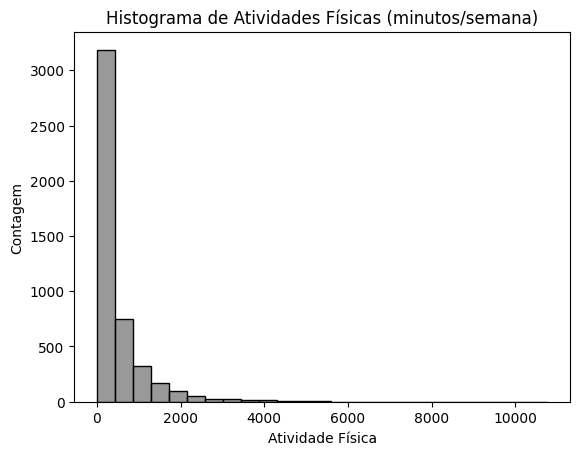

In [87]:
sns.histplot(x= 'PAG_MINW', data=df_unido, bins=25, color='gray', edgecolor= 'black', alpha=0.8)
plt.title('Histograma de Atividades Físicas (minutos/semana)')
plt.xlabel('Atividade Física')
plt.ylabel('Contagem')

Possui uma distribuição assimétrica à direita, porém alguns valores extremos, será verificado através do "describe".

In [88]:
df_unido['PAG_MINW'].describe()

count     4702.000000
mean       484.944251
std        796.184712
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: PAG_MINW, dtype: float64

O valor máximo é um outlier impossível, ou seja, durante 7 dias, é impossível se exercitar 10777.82 minutos, visto que a semana possui apenas 10080 minutos.

Irei considerar que uma pessoa faça no máximo 10h/dia de exercício, será convertido os valores acima de 4200 para 4200 (10h/dia).

In [89]:
df_unido['PAG_MINW'] = np.where(df_unido['PAG_MINW']> 4200, 4200, df_unido['PAG_MINW'])

Text(0, 0.5, 'Contagem')

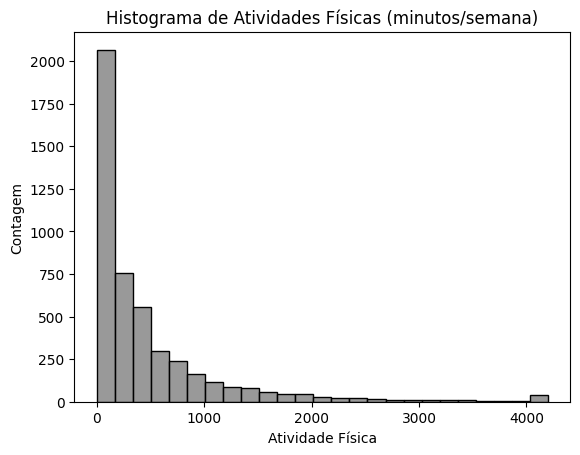

In [90]:
sns.histplot(x= 'PAG_MINW', data=df_unido, bins=25, color='grey', edgecolor= 'black', alpha=0.8)
plt.title('Histograma de Atividades Físicas (minutos/semana)')
plt.xlabel('Atividade Física')
plt.ylabel('Contagem')

In [91]:
df_unido['PAG_MINW'].describe()

count    4702.000000
mean      471.812030
std       695.673720
min         0.000000
25%        41.570439
50%       221.709007
75%       581.986143
max      4200.000000
Name: PAG_MINW, dtype: float64

* Com a assimetria à direita, pode-se presumir que a maior parte da amostra pratica menos que 2000 minutos por semana (33h semanais ou 4,76h diárias)

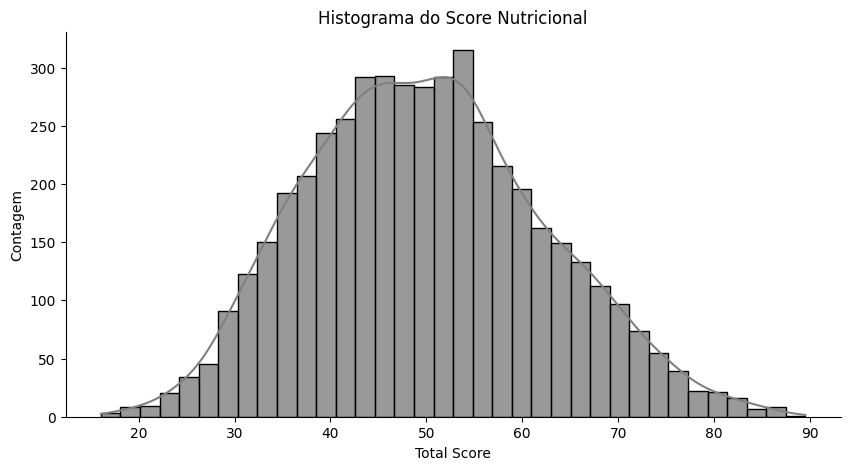

In [92]:
# Criação do histograma
plt.figure(figsize=(10, 5))
sns.histplot(x='HEI2015_TOTAL_SCORE', data=df_unido, color='grey', edgecolor='black', alpha= 0.8, kde=True)

# Adiciona título e rótulos dos eixos
plt.title('Histograma do Score Nutricional')
plt.xlabel('Total Score')
plt.ylabel('Contagem')

plt.grid(False)

sns.despine(right= True)

In [93]:
df_unido['HEI2015_TOTAL_SCORE'].describe()

count    4702.000000
mean       49.930071
std        12.345400
min        16.059212
25%        40.930960
50%        49.457583
75%        58.060844
max        89.529383
Name: HEI2015_TOTAL_SCORE, dtype: float64

- A distribuição se aproxima de uma distribuição normal;
- A média e mediana estão próximas;
- Possuem mais valores entre 40 e 60 score;
- O menor valor é 16.05 e o maior é 89.52. 


## Análise Exploratória - Bivariada

In [94]:
df_unido.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'DPQ_SCORE', 'DEPRESSION_CATEGORY', 'PAG_MINW',
       'ADHERENCE', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

### **Variáveis Categóricas**

**Variáveis Categóricas:** RIAGENDR, RIDRETH1, DMDEDUC, INDFMINC, DEPRESSION_CATEGORY, ADHERENCE

Gênero, Etnia, Grau de escolaridade, Renda, Categoria de sintomas depressivos, Atividades físicas por semana.

**Variáveis que serão comparadas**

* Gênero e grau de escolaridade;

* Gênero e renda;

* Gênero e categoria de sintomas depressivos;

* Etnia e grau de escolaridade;

* Etnia e renda;

* Etnia e categoria de sintomas depressivos;

* Grau de escolaridade e categoria de sintomas depressivos;

* Renda e Categoria de sintomas depressivos;


#### **Gênero e Grau de Escolaridade**

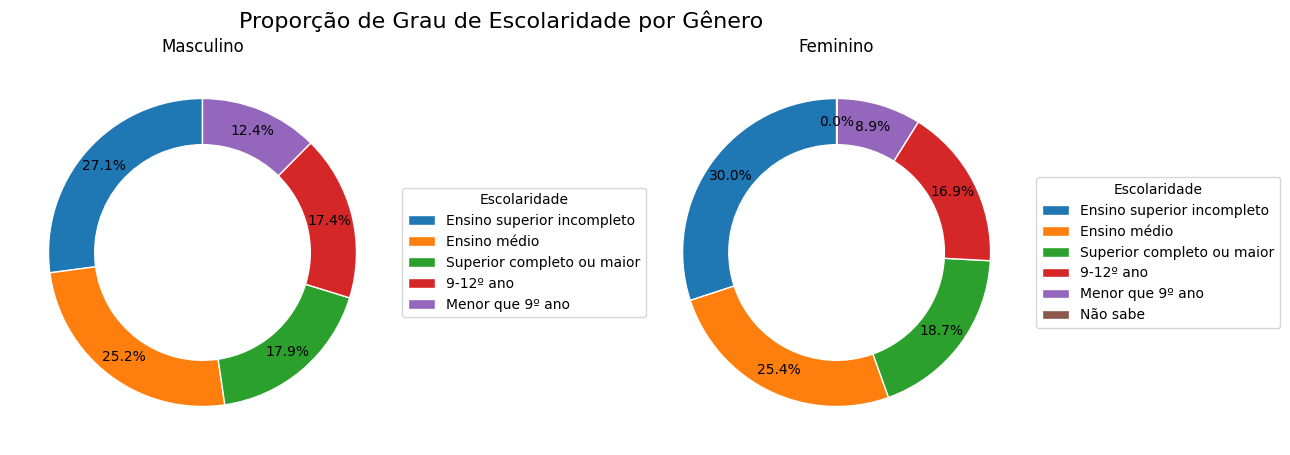

In [95]:
# Vamos selecionar apenas as colunas de interesse
dados_unificados_subconjunto = df_unido[['RIAGENDR', 'DMDEDUC']].copy()

# Mapeando os códigos de escolaridade para seus respectivos rótulos
dados_unificados_subconjunto['DMDEDUC'] = dados_unificados_subconjunto['DMDEDUC'].map(escolaridade)

# Separando os dados por gênero
dados_masculinos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 1]
dados_femininos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 2]

# Contando a quantidade de pessoas por grau de escolaridade para cada gênero
contagem_masculina = dados_masculinos['DMDEDUC'].value_counts()
contagem_feminina = dados_femininos['DMDEDUC'].value_counts()

# Criando os gráficos de donut
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Configurando os parâmetros do gráfico de donut
parametros_donut = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'pctdistance': 0.85,  # Definindo a distância dos percentuais do centro
    'wedgeprops': {'width': 0.3, 'edgecolor': 'w'},  # Largura das barras e cor da borda
}

# Gráfico de donut para o gênero masculino
axes[0].pie(contagem_masculina, labels=None, **parametros_donut)
axes[0].set_title('Masculino')
axes[0].legend(contagem_masculina.index, title='Escolaridade', loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico de donut para o gênero feminino
axes[1].pie(contagem_feminina, labels=None, **parametros_donut)
axes[1].set_title('Feminino')
axes[1].legend(contagem_feminina.index, title='Escolaridade', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Proporção de Grau de Escolaridade por Gênero', fontsize=16)
plt.show()


##### Existe associação entre gênero e grau de escolaridade?

Será feito um teste qui-quadrado para responder à essa pergunta.

**Nível de significância: 0.05**

**H0: Não há associação entre as variáveis;**

**Ha: Há associação entre as variáveis.**

In [102]:
# Tabela de contingência
contingency_table = pd.crosstab(df_unido['RIAGENDR'], df_unido['DMDEDUC'])

# Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

# Imprimir os resultados
print("Estatística qui-quadrado:", chi2)
print("Valor-p:", p)
print("Coeficiente de Cramér:", cramers_v)

if p < 0.05:
    print("Há evidências de que o gênero influencia no grau de escolaridade.")
else:
    print("Não há evidências suficientes para concluir que o gênero influencia no grau de escolaridade.")


Estatística qui-quadrado: 18.880052780225615
Valor-p: 0.0020235560731163287
Coeficiente de Cramér: 0.0633665831332318
Há evidências de que o gênero influencia no grau de escolaridade.


#### **Gênero e Renda**

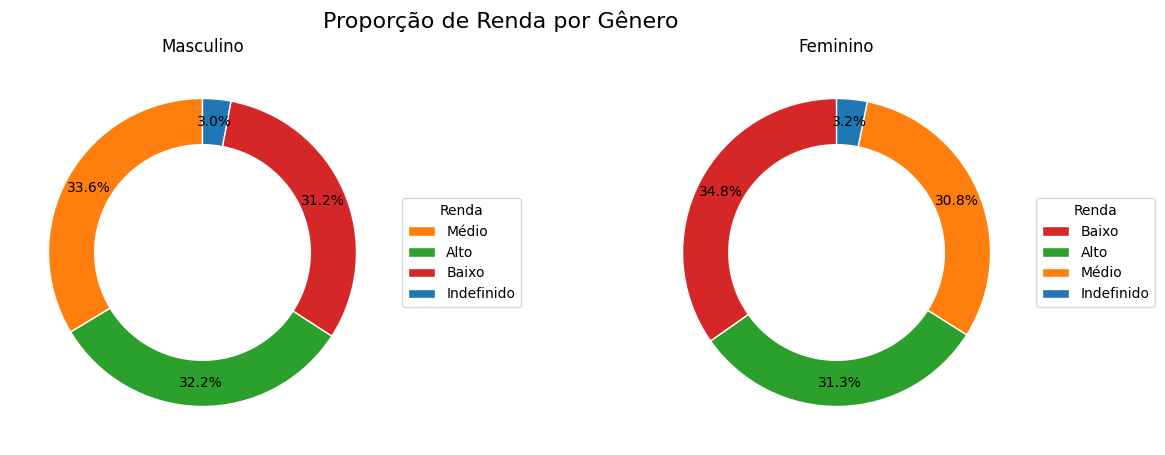

In [99]:
# Vamos selecionar apenas as colunas de interesse
dados_unificados_subconjunto = df_unido[['RIAGENDR', 'INDFMINC']].copy()

# Separando os dados por gênero
dados_masculinos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 1]
dados_femininos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 2]

# Contando a quantidade de pessoas por renda para cada gênero
contagem_masculina = dados_masculinos['INDFMINC'].value_counts()
contagem_feminina = dados_femininos['INDFMINC'].value_counts()

# Cores para as categorias de renda
cores_renda = {
    'Baixo': '#d62728',  # Vermelho
    'Médio': '#ff7f0e',  # Laranja
    'Alto': '#2ca02c',   # Verde
    'Indefinido': '#1f77b4'  # Azul
}

# Criando os gráficos de donut
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Configurando os parâmetros do gráfico de donut
parametros_donut = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'pctdistance': 0.85,  # Definindo a distância dos percentuais do centro
    'wedgeprops': {'width': 0.3, 'edgecolor': 'w'},  # Largura das barras e cor da borda
}

# Gráfico de donut para o gênero masculino
patches, texts, _ = axes[0].pie(contagem_masculina, labels=None, colors=[cores_renda[c] for c in contagem_masculina.index], **parametros_donut)
axes[0].set_title('Masculino')
axes[0].legend(patches, contagem_masculina.index, title='Renda', loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico de donut para o gênero feminino
patches, texts, _ = axes[1].pie(contagem_feminina, labels=None, colors=[cores_renda[c] for c in contagem_feminina.index], **parametros_donut)
axes[1].set_title('Feminino')
axes[1].legend(patches, contagem_feminina.index, title='Renda', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Proporção de Renda por Gênero', fontsize=16)
plt.show()


2. Existe associação entre o gênero e a renda?

#### **Gênero e Categoria de Sintomas Depressivos**

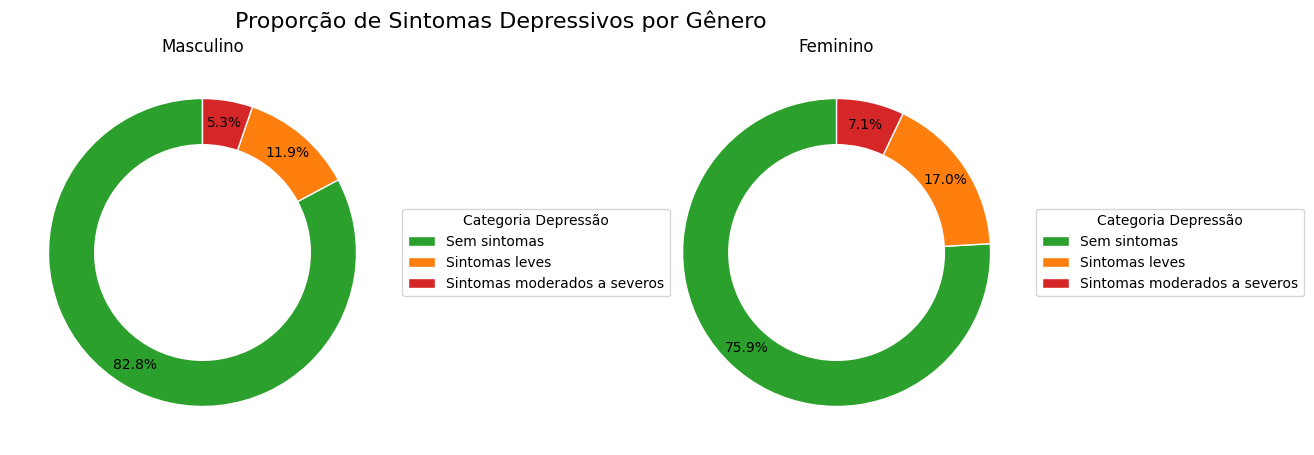

In [100]:
# Vamos selecionar apenas as colunas de interesse
dados_unificados_subconjunto = df_unido[['RIAGENDR', 'DEPRESSION_CATEGORY']].copy()

# Separando os dados por gênero
dados_masculinos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 1]
dados_femininos = dados_unificados_subconjunto[dados_unificados_subconjunto['RIAGENDR'] == 2]

# Contando a quantidade de pessoas por renda para cada gênero
contagem_masculina = dados_masculinos['DEPRESSION_CATEGORY'].value_counts()
contagem_feminina = dados_femininos['DEPRESSION_CATEGORY'].value_counts()

# Criando os gráficos de donut
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Configurando os parâmetros do gráfico de donut
parametros_donut = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'pctdistance': 0.85,  # Definindo a distância dos percentuais do centro
    'wedgeprops': {'width': 0.3, 'edgecolor': 'w'},  # Largura das barras e cor da borda
}

# Cores para as categorias de depressão
cores_depressao = {
    'Sem sintomas': '#2ca02c',   # Verde
    'Sintomas leves': '#ff7f0e',  # Laranja
    'Sintomas moderados a severos': '#d62728',  # Vermelho
}

# Gráfico de donut para o gênero masculino
patches, texts, _ = axes[0].pie(contagem_masculina, labels=None, colors=[cores_depressao[c] for c in contagem_masculina.index], **parametros_donut)
axes[0].set_title('Masculino')
axes[0].legend(patches, contagem_masculina.index, title='Categoria Depressão', loc='center left', bbox_to_anchor=(1, 0.5))

# Gráfico de donut para o gênero feminino
patches, texts, _ = axes[1].pie(contagem_feminina, labels=None, colors=[cores_depressao[c] for c in contagem_feminina.index], **parametros_donut)
axes[1].set_title('Feminino')
axes[1].legend(patches, contagem_feminina.index, title='Categoria Depressão', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Proporção de Sintomas Depressivos por Gênero', fontsize=16)
plt.show()


3. O gênero influencia na categoria dos sintomas depressivos?